Running Rtsne for time series data for patterns.

In [1]:
#loading libraries
library(here)
library(dplyr)
library(tidyr)
library(diann)
library(readr)
library(pheatmap)
library(openxlsx)
library(rstatix)
library("FactoMineR")
library(factoextra)
library(Rtsne)

data.dir<-"Proj2024Jan"
output.dir<-"Proj2024Jan"

source(here("functions.R"))# note for jupyter notebook, we need to do something different
    # because we can not start everything from the root of the project, but inside
    # subfolder (so when we do getwd, we will be get the subfolder). "here" can take
    # care of this nicely (because of the .Rprofile in the folder), so we need to 
    # use here wherever we can!!!

here() starts at /home/feng/ms_analysis


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘rstatix’


The following object is masked from ‘package:stats’:

    filter


Loading required package: ggplot2

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ tibble  3.1.8     ✔ stringr 1.5.0
✔ purrr   1.0.1     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ rstatix::filter() masks dplyr::filter(), stats::filter()
✖ dplyr::lag()      masks stats::lag()


In [2]:
#showing the locations and how here does!!
getwd()
here()

[1] "/home/feng/ms_analysis/Proj2024Jan"

[1] "/home/feng/ms_analysis"

In [3]:
#Start loading data
#x<-here(output.dir,"Trend.vista_vs_ctrl.RDS")
vista_ctrl<-readRDS(file=here(output.dir,"Trend.vista_vs_ctrl.RDS"))
vistaSNS101_ctrl<-readRDS(file=here(output.dir,"Trend.vistaSns101_vs_ctrl.RDS"))
vistaSNS101_vista<-readRDS(file=here(output.dir,"Trend.vista_vs_vistaSNS101.RDS"))

head(vista_ctrl)

cat("the data table dimension:",dim(vista_ctrl),"\n")


Protein.Group,Genes,0,0.5,2,6,12,24
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A0A075B6H7;A0A0C4DH55;P01624,IGKV3-7;IGKV3D-7;IGKV3-15,9.382712e-07,2.17723841,0.2606044,0.05463944,-0.60650344,0.22281650
A0A075B6S5,IGKV1-27,9.059787e-07,6.82645273,0.4343705,-0.41844103,-8.83722481,0.52485091
A0A087WSZ0,IGKV1D-8,-1.732203e-06,2.38891852,0.4788028,0.32075701,-8.87002367,0.43760674
A0A0B4J1V1;P01762;P01763;P01780,IGHV3-21;IGHV3-11;IGHV3-48;IGHV3-7,2.158160e-07,0.00000000,0.0000000,0.00000000,0.00000000,0.00000000
A0A0B4J275,TRAV17,5.653092e-07,0.00000000,4.6094936,-7.93157321,-3.82648203,-4.11770969
A0A0B4J279,TRAV21,2.121867e-07,-0.06084316,4.4152203,4.33050827,0.01562546,-0.08657776


the data table dimension: 6828 8 


As a good practise, we want to do scaling on the data to make all time points contribute equally, but in this case, we can not do that, since the data are difference from the control data. In this sense, they are already centered. But should we further scale them? Not sure.


## First try on Vista vs. Ctrl compariso

In [4]:
#vista_ctrl.scaled<-
#    scale(vista_ctrl[,c("0.5","2","6","12","24")])
#vista_ctrl.scaled<-bind_cols(vista_ctrl[,c(1:3)],vista_ctrl.scaled)
#head(vista_ctrl)

#now let's do PCA first.
vista_ctrl.matrix<-vista_ctrl[,-c(1:2)]
set.seed(50)
tsne.vista_ctrl<-Rtsne(vista_ctrl.matrix, perplexity=30, max_iter=1000, dims=3)

In [5]:
summary(tsne.vista_ctrl)

                    Length Class  Mode   
N                       1  -none- numeric
Y                   20484  -none- numeric
costs                6828  -none- numeric
itercosts              20  -none- numeric
origD                   1  -none- numeric
perplexity              1  -none- numeric
theta                   1  -none- numeric
max_iter                1  -none- numeric
stop_lying_iter         1  -none- numeric
mom_switch_iter         1  -none- numeric
momentum                1  -none- numeric
final_momentum          1  -none- numeric
eta                     1  -none- numeric
exaggeration_factor     1  -none- numeric

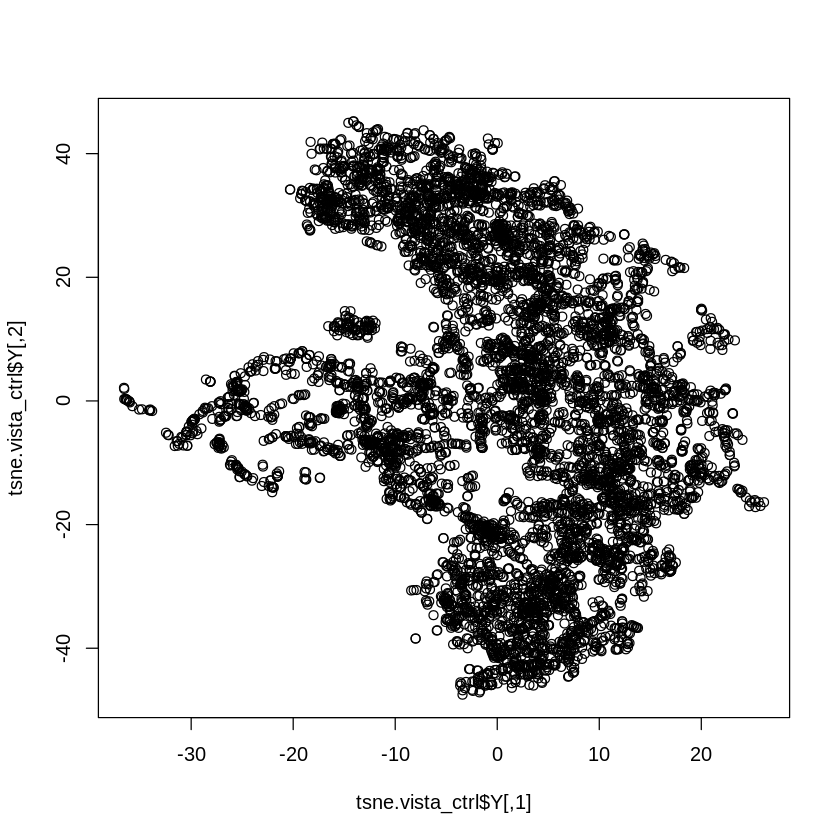

In [6]:
options(jupyter.plot_mimetypes = c("text/plain", "image/png" ))

plot(tsne.vista_ctrl$Y)

it seems that there are many small clusters/groups.

## Second, we compare Vista SNS101 vs. control.

In [7]:
vistaSNS101_ctrl.matrix<-vistaSNS101_ctrl[,-c(1:2)]
set.seed(50)
tsne.vistaSNS101_ctrl<-Rtsne(vistaSNS101_ctrl.matrix, perplexity=30, max_iter=1000, dims=3)

summary(tsne.vistaSNS101_ctrl)

                    Length Class  Mode   
N                       1  -none- numeric
Y                   20484  -none- numeric
costs                6828  -none- numeric
itercosts              20  -none- numeric
origD                   1  -none- numeric
perplexity              1  -none- numeric
theta                   1  -none- numeric
max_iter                1  -none- numeric
stop_lying_iter         1  -none- numeric
mom_switch_iter         1  -none- numeric
momentum                1  -none- numeric
final_momentum          1  -none- numeric
eta                     1  -none- numeric
exaggeration_factor     1  -none- numeric

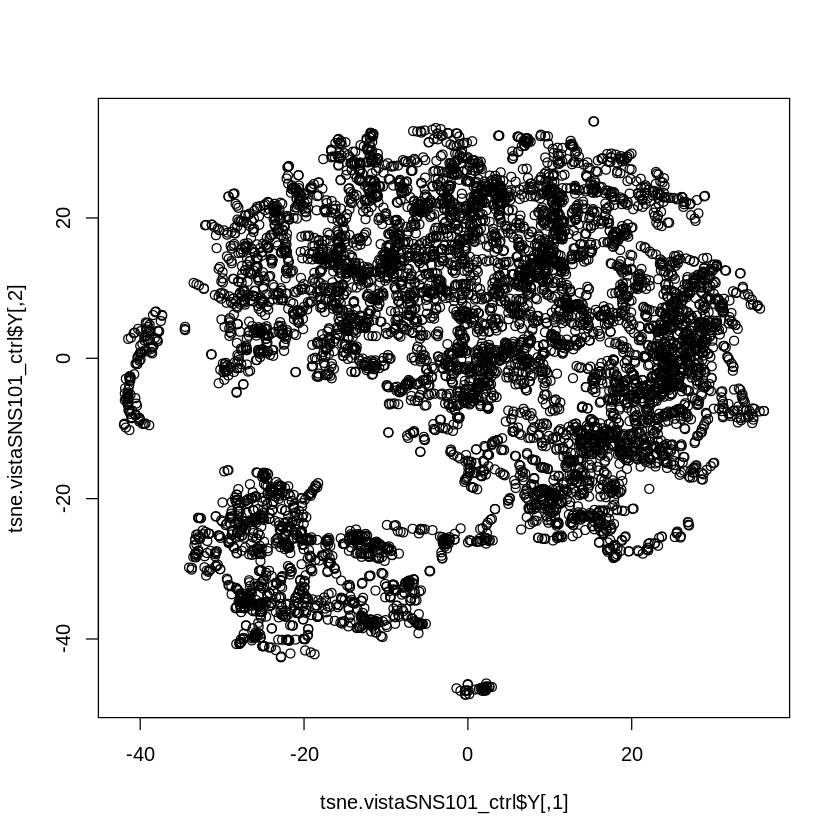

In [8]:

plot(tsne.vistaSNS101_ctrl$Y)

Similarly, many small clusters.

## Lastly, we do the difference between SNS101 vista vs Vista

In [9]:
vistaSNS101_vista.matrix<-vistaSNS101_vista[,-c(1:2)]
set.seed(50)
tsne.vistaSNS101_vista<-Rtsne(vistaSNS101_vista.matrix,perplexity=30, max_iter=1000, dims=3)

summary(tsne.vistaSNS101_vista)

                    Length Class  Mode   
N                       1  -none- numeric
Y                   20484  -none- numeric
costs                6828  -none- numeric
itercosts              20  -none- numeric
origD                   1  -none- numeric
perplexity              1  -none- numeric
theta                   1  -none- numeric
max_iter                1  -none- numeric
stop_lying_iter         1  -none- numeric
mom_switch_iter         1  -none- numeric
momentum                1  -none- numeric
final_momentum          1  -none- numeric
eta                     1  -none- numeric
exaggeration_factor     1  -none- numeric

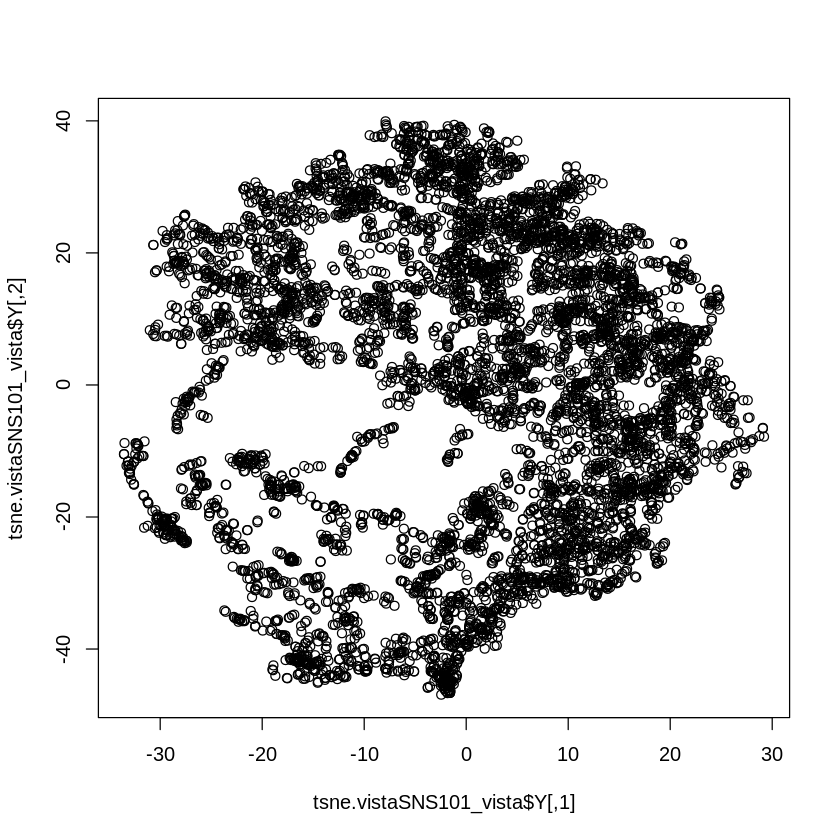

In [10]:

plot(tsne.vistaSNS101_vista$Y)

The pattern is similar, showing many groups/clusters. 

Done

In [11]:
sessionInfo()

R version 4.2.2 (2022-10-31)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Ubuntu 22.04.2 LTS

Matrix products: default
BLAS/LAPACK: /opt/conda/lib/libopenblasp-r0.3.21.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices datasets  utils     methods   base     

other attached packages:
 [1] forcats_0.5.2    stringr_1.5.0    purrr_1.0.1      tibble_3.1.8    
 [5] tidyverse_1.3.2  Rtsne_0.17       factoextra_1.0.7 ggplot2_3.4.0   
 [9] FactoMineR_2.8   rstatix_0.7.2    openxlsx_4.2.5.2 pheatmap_1.0.12 
[13] readr_2.1.3      diann_1.0.1      tidyr_1.3.0      dplyr_1.0.10    
[17] here_1.0.1      

loaded via a n